# Analyzing Data from Multiple Files

## Learning Objectives

 *   Use a library function to get a list of filenames that match a simple wildcard pattern.
 *   Use a for loop to process multiple files.

We now have almost everything we need to process all our data files.
The only thing that's missing is a library with a rather unpleasant name:

In [2]:
import glob

The `glob` library contains a single function, also called `glob`,
that finds files whose names match a pattern.
We provide those patterns as strings:
the character `*` matches zero or more characters,
while `?` matches any one character.
We can use this to get the names of all the html files:

In [2]:
print glob.glob('*.ipynb')

['01-intro.ipynb', '02-loops.ipynb', '03-lists.ipynb', '04-files.ipynb']


As these examples show,
`glob.glob`'s result is a list of strings,
which means we can loop over it
to do something with each filename in turn.
In our case,
the "something" we want to do is generate a plot for each bedfile in our directory.
Let's test it by analyzing the first three files in the list:

data/wgEncodeCshlShortRnaSeqA549CellCiptapContigs.bedRnaElements
data/wgEncodeCshlShortRnaSeqA549CellContigs.bedRnaElements
data/wgEncodeCshlShortRnaSeqA549CytosolCiptapContigs.bedRnaElements


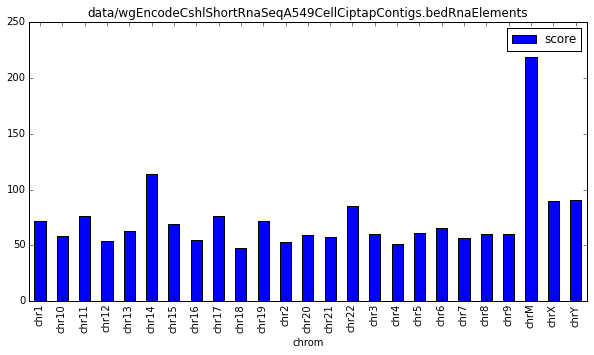

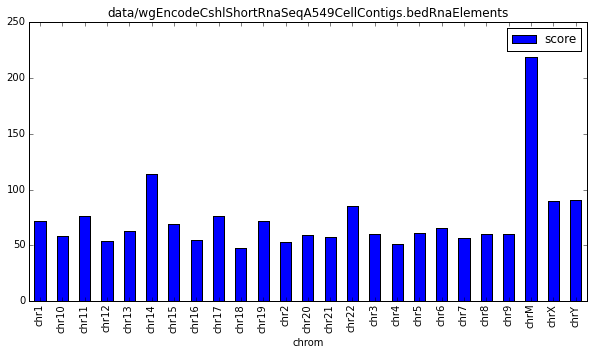

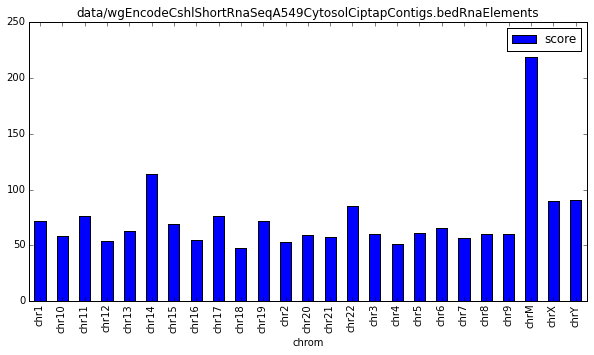

In [4]:
import pandas
%matplotlib inline
filenames = glob.glob('data/*.bedRnaElements')
filenames = filenames[0:3]
cols = ['chrom','chromStart','chromEnd','name','score','strand','level','signif','score2']

for f in filenames:
    print f
    data = pandas.read_table('data/A549.bed', header=None)
    data.columns = cols
    data.groupby('chrom').mean().plot(kind='bar',y='score', ylim=[0,250], title=f, figsize=(10,5))


Sure enough,
we can see the data set we were using earlier, which had a lot of regions on chrM. The other files aren't weighted the same, and for questions like this we could easily put together a script that plotted many data sets without repeating yourself